In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fi = np.load("../16000MeV_10Perc_SB_150_Apr_27_preds_synthsig_DATA.npz")

for i in fi.keys():
    print(i)

preds_data
preds_gen


In [3]:
preds_gen = fi['preds_gen']

In [4]:
ws = np.load("/data0/users/wmccorma/Jan_2021_perc_mass_scan/Official_synthsig_10Perc_perc_5_mass.npy")

In [5]:
itnum = 10
denom = np.sum(ws[itnum])/200000.

In [6]:
preds_data = fi['preds_data']

In [7]:
print(np.average(preds_data[:20000,1]))

0.73499465


In [8]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
cuts = []
for i in range(10):
    cuts.append(.5+0.05*float(i))

In [10]:
print(cuts)

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95]


In [11]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 20000):
                num_true[c] += 1.
print(num_data)
print(num_true)

[62832. 54687. 45396. 35085. 24882. 16366. 10477.  6339.  3388.  1115.]
[18860. 18040. 16752. 14747. 12237.  9434.  6937.  4702.  2764.   966.]


In [12]:
print(len(preds_gen))
print(ws[0])
print(20./26.)
print(np.sum(ws[itnum]))

260000
[0.76923077 0.76923077 0.76923077 ... 0.76923077 0.76923077 0.76923077]
0.7692307692307693
203508.14737125766


In [13]:
print(np.average(preds_data[:20000,1]))
print(np.average(preds_gen[40000:50000,1]))
print(np.sum(ws[10])/200000.)
print(np.average(ws[10][:10000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][10000:20000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][20000:30000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][30000:40000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][40000:50000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][50000:60000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][100000:110000]/(np.sum(ws[10])/200000.)))

0.73499465
0.38254952
1.0175407368562883
0.4985528357940988
0.5352907210502265
0.636840352161089
0.7824270040238076
0.8028286720055947
0.8062340206377276
0.7977538743134045


In [14]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=20000./26000.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[51250.00000007 43490.00000004 35149.23076923 26247.69230768
 17716.15384615 10776.15384615  6197.69230769  3437.69230769
  1628.46153846   500.        ]
[53651.66582634 45432.32687071 36556.09466261 27038.2889431
 17965.35892669 10787.63472227  6159.52139119  3402.91806008
  1608.68727606   492.7620312 ]


In [15]:
import matplotlib.pyplot as plt
import OmniFold.modplot as modplot

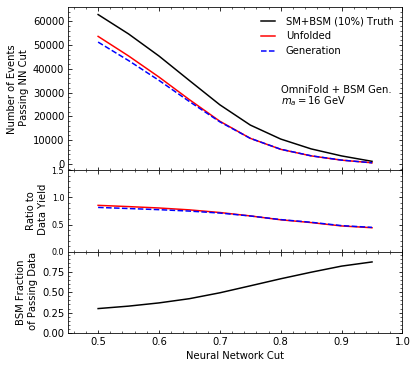

In [16]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.45, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.0,1.5])
ax2.set_ylim([0.0,.99])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (10%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.8, 30000, 'OmniFold + BSM Gen.')
ax0.text(.8, 25000, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_omni_16GeV_10perc_BSMGen.pdf', bbox_inches = "tight")

In [17]:
cuts = []
for i in range(10):
    cuts.append(.8+0.02*float(i))

In [18]:
print(cuts)

[0.8, 0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.88, 0.9, 0.92, 0.9400000000000001, 0.9600000000000001, 0.98]


In [19]:
fi = np.load("../16000MeV_0Perc_SB_150_Apr_27_preds_synthsig_DATA.npz")
preds_gen = fi['preds_gen']
preds_data = fi['preds_data']
ws = np.load("/data0/users/wmccorma/Jan_2021_perc_mass_scan/Official_synthsig_0Perc_perc_5_mass.npy")

In [20]:
print(np.average(preds_data[:20000,1]))
print(np.average(preds_gen[40000:50000,1]))
print(np.sum(ws[10])/200000.)
print(np.average(ws[10][:10000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][10000:20000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][20000:30000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][30000:40000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][40000:50000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][50000:60000])/(np.sum(ws[10])/200000.))
print(np.average(ws[10][100000:110000]/(np.sum(ws[10])/200000.)))

0.28408718
0.38254952
0.9633074122734285
0.46885592274575244
0.5081107280144179
0.626632750021003
0.756854118552257
0.7504865653514365
0.7504000461953302
0.809524740717453


In [21]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 200):
                num_true[c] += 1.
print(num_data)
print(num_true)

[3988. 2991. 2196. 1534. 1041.  708.  439.  255.  103.   33.]
[68. 64. 52. 43. 35. 29. 22. 14. 10.  3.]


In [22]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=1.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[8057. 6386. 5045. 3891. 2970. 2117. 1469.  882.  456.  137.]
[5675.23641988 4534.8546753  3613.29086582 2807.10375521 2168.43309239
 1562.11075169 1090.78536483  652.85661124  351.62954451  107.25170427]


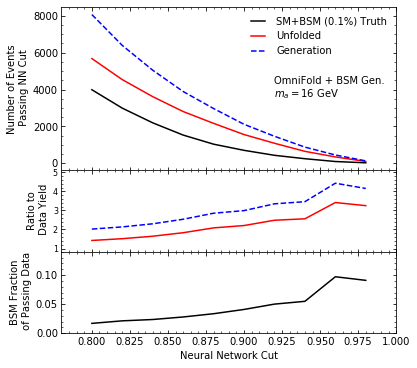

In [23]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.78, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.83,5.11])
ax2.set_ylim([0.0,.14])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (0.1%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')
#ax0.set_yscale('log')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.92, 4300, 'OmniFold + BSM Gen.')
ax0.text(0.92, 3600, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_omni_16GeV_0perc_BSMGen.pdf', bbox_inches = "tight")